In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv('Data/reviews.csv')

In [74]:
df.head(5)

,Unnamed: 0,reviews
0,0,Not Verified | Another case of reviewing Brit...
1,1,✅ Trip Verified | On the memorable day of Janu...
2,2,Not Verified | I did not actually get to fly w...
3,3,✅ Trip Verified | We had possibly the worse ch...
4,4,✅ Trip Verified | I flew to LHR from ATH in C...


In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [77]:
df['reviews'] = df['reviews'].astype(str)

In [78]:
df['reviews'] = df['reviews'].apply(lambda x: x.split('|')[1])

In [79]:
df.head(5)

,reviews
0,Another case of reviewing British Airways fl...
1,"On the memorable day of January 9th, my famil..."
2,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...
4,I flew to LHR from ATH in Club Europe with B...


# Now it's time to Data Preprocessing
Here are the steps
1.Cleaning the text 
2.Tokenization
3.Removing the stop words
4.Lemmatization

In [80]:
# Step 1 Cleaning the text

In [81]:
import re 
def clean(text):
    text = re.sub('[^\w\s]',' ',str(text))
    return text

df['Clean reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Clean reviews
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...


In [82]:
# Step 2 Tokenization

In [83]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/uktamnishonov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/uktamnishonov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
def tokenize(text):
    return nltk.word_tokenize(text)

df['Tokenized reviews'] = df['Clean reviews'].apply(tokenize)

In [85]:
df.head()

,reviews,Clean reviews,Tokenized reviews
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[Another, case, of, reviewing, British, Airway..."
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[On, the, memorable, day, of, January, 9th, my..."
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[I, did, not, actually, get, to, fly, with, BA..."
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[We, had, possibly, the, worse, check, in, exp..."
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[I, flew, to, LHR, from, ATH, in, Club, Europe..."


In [96]:
# change the tokenized reviews to lower case so that we can remove the stop words
def lower_case(text):
    return [word.lower() for word in text]

df['Tokenized reviews'] = df['Tokenized reviews'].apply(lower_case)

In [97]:
# Step 3 Removing the stop words 

In [98]:
# get the stopwords english
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)
stop_words.append('I','One','The','It','This','That','We','You','They','He','She','It','We','They','One','The','A','An','And','But','Or','If','Unless','Until','While','As','Because','Since','So','Though','Although','Even','If','Once','Unless','Until','When','Whenever','While','Although','Because','Since','So','That','Though','Unless','Until','What','Whatever','When','Whenever','Where','Wherever','Whether','Which','While','Who','Whoever','Whom','Whose','Why','How','However','Whereas','Whose','Whom','Whoever','Who','While','Which','Whether','Wherever','Where','Whenever','When','Whatever','What','Until','Unless','Though','That','So','Since','Because','As','While','Whenever','When','Until','Unless','If','Even','Although','Though','So','Since','Because','As','And','Or','But','An','A','The','One')

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uktamnishonov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: list.append() takes exactly one argument (105 given)

In [99]:
# remove the stop words in tokenized reviews
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Tokenized reviews'] = df['Tokenized reviews'].apply(remove_stopwords)

In [100]:
df.head()

,reviews,Clean reviews,Tokenized reviews
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f..."
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke..."
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,..."
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve..."
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,..."


In [101]:
# Step 4 Lemmatization

In [102]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [103]:
def lemmatize(text):
    return [lemmatizer.lemmatize(word) for word in text]

df['Lemma'] = df['Tokenized reviews'].apply(lemmatize)

In [104]:
df.head()

,reviews,Clean reviews,Tokenized reviews,Lemma
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f...","[another, case, reviewing, british, airway, fl..."
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke...","[memorable, day, january, 9th, family, embarke..."
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,...","[actually, get, fly, ba, cancelled, flight, 3,..."
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve...","[possibly, worse, check, experience, ever, eve..."
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,...","[flew, lhr, ath, club, europe, ba641, dec, 31,..."


In [105]:
# Now we'll detect the sentiment of the reviews

In [107]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer() 

In [115]:
def vaderanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs

df['Sentiment'] = df['Lemma'].apply(vaderanalysis)

In [117]:
df.head(16)

,reviews,Clean reviews,Tokenized reviews,Lemma,Sentiment
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f...","[another, case, reviewing, british, airway, fl...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke...","[memorable, day, january, 9th, family, embarke...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,...","[actually, get, fly, ba, cancelled, flight, 3,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve...","[possibly, worse, check, experience, ever, eve...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,...","[flew, lhr, ath, club, europe, ba641, dec, 31,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,I like the British Airways World Traveller P...,I like the British Airways World Traveller P...,"[like, british, airways, world, traveller, plu...","[like, british, airway, world, traveller, plus...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage...,"[come, boarding, cabin, luggage, taken, plane,...","[come, boarding, cabin, luggage, taken, plane,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[stinking, nappies, changed, business, cabin, ...","[stinking, nappy, changed, business, cabin, th...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of d...,"[worst, service, ever, lost, baggage, delayed,...","[worst, service, ever, lost, baggage, delayed,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,BA 246 21JAN 2023 Did not appreciate the unp...,BA 246 21JAN 2023 Did not appreciate the unp...,"[ba, 246, 21jan, 2023, appreciate, unprofessio...","[ba, 246, 21jan, 2023, appreciate, unprofessio...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [118]:
# do this thing sentiment with textblob

In [120]:
from textblob import TextBlob

In [127]:
def textblobanalysis(review):
    text = ' '.join(review)
    br = TextBlob(text).sentiment
    polarity = br.polarity
    return polarity

In [128]:
df['Sentiment2'] = df['Lemma'].apply(textblobanalysis)

In [129]:
df.head()

,reviews,Clean reviews,Tokenized reviews,Lemma,Sentiment,Sentiment2
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f...","[another, case, reviewing, british, airway, fl...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.150000
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke...","[memorable, day, january, 9th, family, embarke...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.208958
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,...","[actually, get, fly, ba, cancelled, flight, 3,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.266667
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve...","[possibly, worse, check, experience, ever, eve...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.043056
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,...","[flew, lhr, ath, club, europe, ba641, dec, 31,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.208333


In [130]:
# depending on sentiment we'll classify the reviews as positive, negative or neutral

In [155]:
def classify_sentiment(score):
    if score >= 0.1:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [156]:
df['Analysis'] = df['Sentiment2'].apply(classify_sentiment)

In [157]:
df.head()

,reviews,Clean reviews,Tokenized reviews,Lemma,Sentiment,Sentiment2,Analysis
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f...","[another, case, reviewing, british, airway, fl...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.150000,Positive
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke...","[memorable, day, january, 9th, family, embarke...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.208958,Positive
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,...","[actually, get, fly, ba, cancelled, flight, 3,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.266667,Positive
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve...","[possibly, worse, check, experience, ever, eve...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.043056,Neutral
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,...","[flew, lhr, ath, club, europe, ba641, dec, 31,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.208333,Positive


In [158]:
df['Analysis'].value_counts()

Analysis
Positive    424
Negative    348
Neutral     228
Name: count, dtype: int64

In [159]:
df.drop(['Sentiment'], axis=1, inplace=True)

In [160]:
df.head()

,reviews,Clean reviews,Tokenized reviews,Lemma,Sentiment2,Analysis
0,Another case of reviewing British Airways fl...,Another case of reviewing British Airways fl...,"[another, case, reviewing, british, airways, f...","[another, case, reviewing, british, airway, fl...",0.150000,Positive
1,"On the memorable day of January 9th, my famil...",On the memorable day of January 9th my famil...,"[memorable, day, january, 9th, family, embarke...","[memorable, day, january, 9th, family, embarke...",0.208958,Positive
2,I did not actually get to fly with BA as they...,I did not actually get to fly with BA as they...,"[actually, get, fly, ba, cancelled, flight, 3,...","[actually, get, fly, ba, cancelled, flight, 3,...",0.266667,Positive
3,We had possibly the worse check-in experience...,We had possibly the worse check in experience...,"[possibly, worse, check, experience, ever, eve...","[possibly, worse, check, experience, ever, eve...",0.043056,Neutral
4,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with B...,"[flew, lhr, ath, club, europe, ba641, dec, 31,...","[flew, lhr, ath, club, europe, ba641, dec, 31,...",0.208333,Positive


In [161]:
import matplotlib.pyplot as plt 
%matplotlib inline

([<matplotlib.patches.Wedge at 0x13ab81a50>,
 [Text(0.2601489135374878, 1.0687949021141825, 'Positive'),
  Text(-0.8979732157620716, -0.6353299172665523, 'Negative'),
  Text(0.8296764509178302, -0.7222444093188909, 'Neutral')],
 [Text(0.14189940738408424, 0.5829790375168268, '42.4%'),
  Text(-0.4898035722338572, -0.3465435912363012, '34.8%'),
  Text(0.45255079140972543, -0.39395149599212226, '22.8%')])

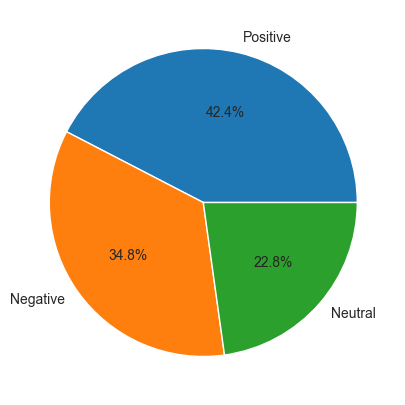

In [162]:
plt.figure(figsize=(10,5))

plt.pie(df['Analysis'].value_counts(), labels = df['Analysis'].value_counts().index, autopct='%1.1f%%')